In [1]:
# Imports
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OneHotEncoder

In [2]:
conn = sqlite3.connect('../../../../data/im.db')

In [3]:
# Load the list of tables in the DB
tables = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
tables

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [4]:
# Look into movie ratings
movie_ratings = pd.read_sql("""
    SELECT *
    FROM movie_ratings""", conn)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [5]:
# Look into movie basics
movie_basics = pd.read_sql("""
    SELECT *
    FROM movie_basics""", conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [6]:
# Checking to see if any movie id appears more than once
pd.read_sql("""
    SELECT *
    FROM movie_basics
    GROUP BY movie_id
    HAVING COUNT(movie_id) > 1;
""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres


In [7]:
# Connect the two tables
mb_mr = pd.read_sql("""
    SELECT *
    FROM movie_basics as b
    INNER JOIN movie_ratings as r
        ON b.movie_id = r.movie_id;
""", conn)
mb_mr 

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119
...,...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,tt9913084,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",tt9914286,8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,tt9914642,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,tt9914942,6.6,5


In [8]:
# Will remove duplicate column without damaging indeces
mb_mr = mb_mr.loc[:, ~mb_mr.columns.duplicated()].copy()
mb_mr

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [9]:
# Split genres and create a new entry for each of the genre a movie falls into
### FROM Leo's EDA notebook
s = mb_mr['genres'].str.split(',').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genre'
del mb_mr['genres']
mb_mr_genres = mb_mr.join(s)

In [10]:
mb_mr_genres = mb_mr_genres[['primary_title', 'genre']]
mb_mr_genres.head(20)

,primary_title,genre
0,Sunghursh,Action
0,Sunghursh,Crime
0,Sunghursh,Drama
1,One Day Before the Rainy Season,Biography
1,One Day Before the Rainy Season,Drama
2,The Other Side of the Wind,Drama
3,Sabse Bada Sukh,Comedy
3,Sabse Bada Sukh,Drama
4,The Wandering Soap Opera,Comedy
4,The Wandering Soap Opera,Drama


## Load in tn.movie.budgets.csv
### Cleaning

In [11]:
budgets = pd.read_csv("../../../../data/tn.movie_budgets.csv")
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [12]:
# removing $ and , from gross revenue
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace(",","")
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace("$","")
budgets['production_budget'] = budgets['production_budget'].str.replace(",","")
budgets['production_budget'] = budgets['production_budget'].str.replace("$","")

# casting the values as integers
budgets['production_budget'] = pd.to_numeric(budgets['production_budget'])
budgets['worldwide_gross'] = pd.to_numeric(budgets['worldwide_gross'])

# calculating total profit
budgets['total_profit'] =  budgets['worldwide_gross'] - budgets['production_budget']

# Keep only movie and total_profit columns
budgets = budgets[['movie', 'total_profit']]

# confirmation
budgets.head()

,movie,total_profit
0,Avatar,2351345279
1,Pirates of the Caribbean: On Stranger Tides,635063875
2,Dark Phoenix,-200237650
3,Avengers: Age of Ultron,1072413963
4,Star Wars Ep. VIII: The Last Jedi,999721747


## Merge budget df into mb_mr_genres

In [13]:
combined = pd.merge(mb_mr_genres, budgets, left_on="primary_title", right_on="movie")
combined.drop(columns="movie", inplace=True)
combined

,primary_title,genre,total_profit
0,Foodfight!,Action,-44926294
1,Foodfight!,Animation,-44926294
2,Foodfight!,Comedy,-44926294
3,The Overnight,NaN,965996
4,The Overnight,Comedy,965996
...,...,...,...
6447,Heroes,Documentary,255538
6448,Push,Documentary,11678401
6449,Unplanned,Biography,12107621
6450,Unplanned,Drama,12107621


The duplicate values in the rows are okay to have for what I am going to
accomplish with them. I will create a boxplot where the x is the genre categories, and the y is the total_profit column associated with those genres. Before proceeding to that, I need to clean up the new table and deal with outliers.

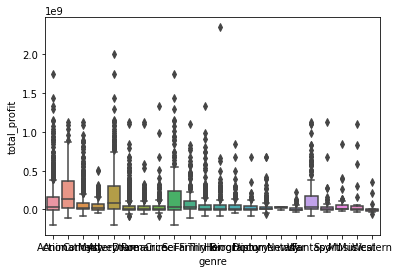

In [14]:
# Unclean chart for reference to visualize the outliers
sns.boxplot(x=combined['genre'], y=combined['total_profit']);

## Cleaning + dealing with outliers

In [15]:
# Getting 25th percentile of genre counts... the max 1491 is drama
combined['genre'].value_counts().describe()

count      22.000000
mean      292.909091
std       337.309369
min         3.000000
25%        71.250000
50%       199.500000
75%       361.500000
max      1491.000000
Name: genre, dtype: float64

In [16]:
# looking at genre counts... 
combined['genre'].value_counts()

Drama          1491
Comedy          758
Action          630
Thriller        509
Adventure       448
Crime           362
Horror          360
Romance         326
Mystery         223
Documentary     204
Sci-Fi          204
Biography       195
Fantasy         175
Family          144
Animation       130
Music            72
History          71
Sport            62
War              39
Musical          22
Western          16
News              3
Name: genre, dtype: int64

In [17]:
# remove any genre where the count is lower than 100
mask = combined['genre'].value_counts() > 100

vals_to_keep = []
for x in mask.items():
    if x[1] == True:
        vals_to_keep.append(x[0])
        
vals_to_keep

['Drama',
 'Comedy',
 'Action',
 'Thriller',
 'Adventure',
 'Crime',
 'Horror',
 'Romance',
 'Mystery',
 'Documentary',
 'Sci-Fi',
 'Biography',
 'Fantasy',
 'Family',
 'Animation']

In [18]:
# Create table where we've kept rows where the value in genre
# matched the vals_to_keep
combined = combined.loc[combined['genre'].isin(vals_to_keep)]
combined

,primary_title,genre,total_profit
0,Foodfight!,Action,-44926294
1,Foodfight!,Animation,-44926294
2,Foodfight!,Comedy,-44926294
4,The Overnight,Comedy,965996
5,The Overnight,Mystery,965996
...,...,...,...
6447,Heroes,Documentary,255538
6448,Push,Documentary,11678401
6449,Unplanned,Biography,12107621
6450,Unplanned,Drama,12107621


## Charting
### Dealing with outliers using showfliers=False

''

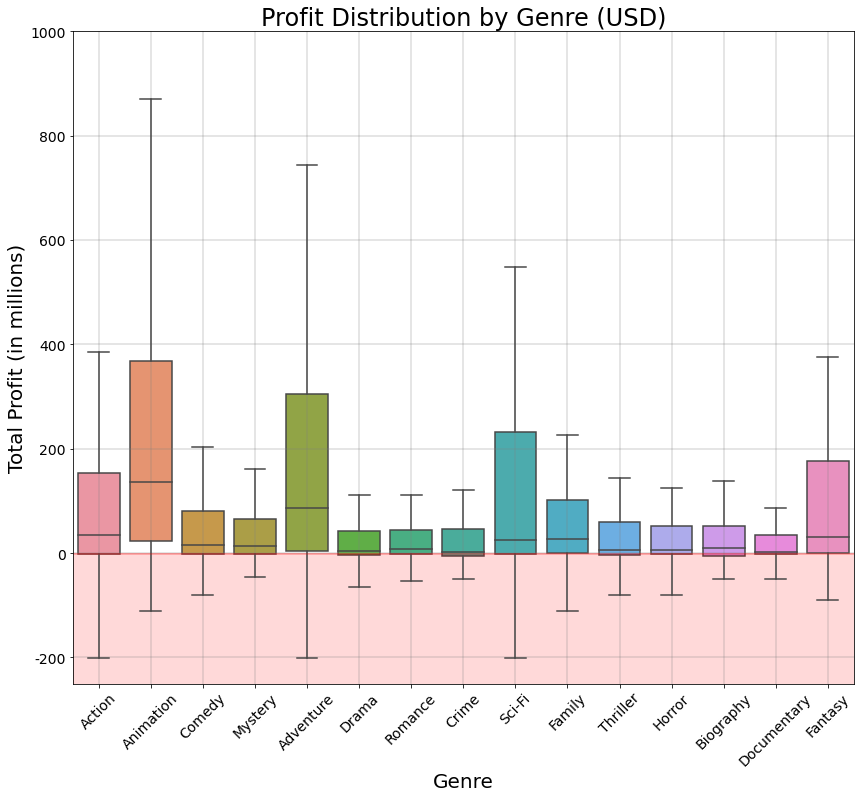

In [19]:
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(figsize = (14,12))
sns.boxplot(ax=ax, x=combined['genre'],
            y=combined['total_profit'],
            showfliers=False)

plt.style.use('seaborn-muted')

# scale y axis to millions
scale_y = 1e6
ticks_y = FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)
ax.set_ylim(-250000000, 1000000000)

# add title/labels/ticks/grid
ax.set_title('Profit Distribution by Genre (USD)', size=24)
plt.xlabel("Genre", size = 20)
plt.ylabel("Total Profit (in millions)", size=20)
plt.yticks(fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.grid(color='gray', linestyle='-', linewidth=2, alpha=0.2)

# create red area in negative y
plt.axhline(y=[-1000000], alpha=0.3, color='red', fillstyle='bottom')
plt.axhspan(-2500000000, 0, alpha=0.15, color='red')

# saves fig
#plt.savefig('../resources/charts/prof_genre_box.png', dpi=fig.dpi)
;

### Narrow down genres

In [20]:
# look at what genres have the top median profits
med_combined = combined.groupby('genre', sort='total_profit').median()
med_combined = med_combined.sort_values(by='total_profit', ascending=False)
med_combined_8 = med_combined.head(8)
med_combined_8

,total_profit
genre,
Animation,135634931.5
Adventure,87045238.5
Action,34832981.0
Fantasy,30401882.0
Family,26701315.0
Sci-Fi,25068677.5
Comedy,15275343.5
Mystery,13945682.0


In [21]:
# Preparing to keep only the top 8 median genres
vals_to_keep = []
for x in med_combined_8.iterrows():
    vals_to_keep.append(x[0])
        
vals_to_keep

['Animation',
 'Adventure',
 'Action',
 'Fantasy',
 'Family',
 'Sci-Fi',
 'Comedy',
 'Mystery']

In [22]:
# Create table where we've kept rows where the value in genre
# matched the vals_to_keep
top_8_combined = combined.loc[combined['genre'].isin(vals_to_keep)]
top_8_combined

,primary_title,genre,total_profit
0,Foodfight!,Action,-44926294
1,Foodfight!,Animation,-44926294
2,Foodfight!,Comedy,-44926294
4,The Overnight,Comedy,965996
5,The Overnight,Mystery,965996
...,...,...,...
6427,Teefa in Trouble,Comedy,-1401194
6432,Happy Death Day 2U,Mystery,55179495
6435,Blinded by the Light,Comedy,-15000000
6440,An Ideal Husband,Comedy,20641183


## Charting the 8 genres with the highest median profit

''

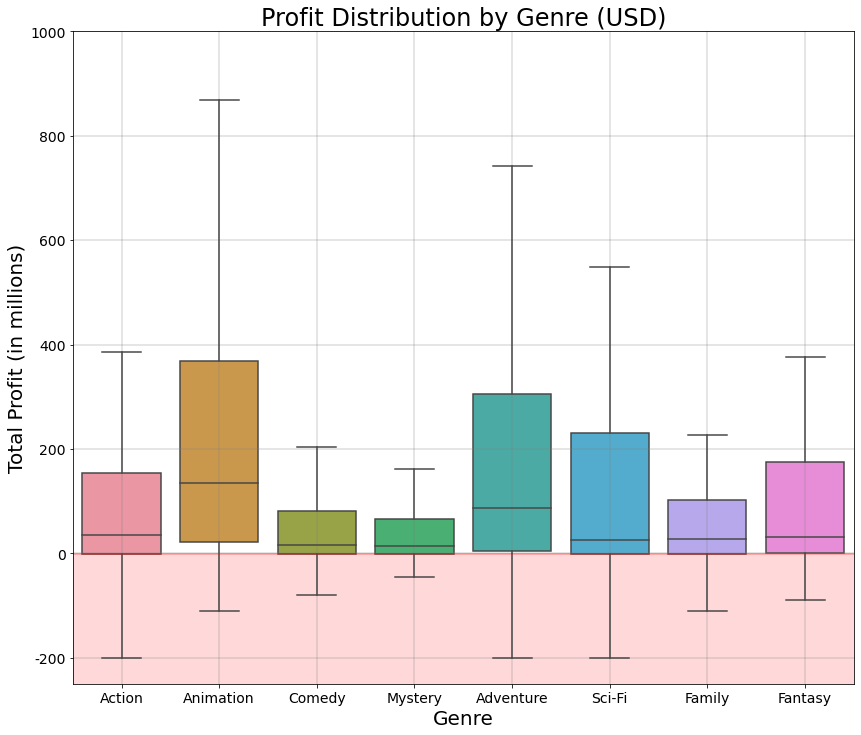

In [23]:
fig, ax = plt.subplots(figsize = (14,12))
sns.boxplot(ax=ax, x=top_8_combined['genre'],
            y=top_8_combined['total_profit'],
            showfliers=False)

plt.style.use('seaborn-muted')

# scale y axis to millions
scale_y = 1e6
ticks_y = FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)
ax.set_ylim(-250000000, 1000000000)

# title/labels/ticks
ax.set_title('Profit Distribution by Genre (USD)', size=24)
plt.xlabel("Genre", size = 20)
plt.ylabel("Total Profit (in millions)", size=20)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(color='gray', linestyle='-', linewidth=2, alpha=0.2)

# adding negative y color
plt.axhline(y=[-1000000], alpha=0.3, color='red', fillstyle='bottom')
plt.axhspan(-250000000, 0, alpha=0.15, color='red')

# save fig
#plt.savefig('../resources/charts/top8_prof_genre_box.png', bbox_inches='tight')
;

## Charting the top 8 WITH outliers

''

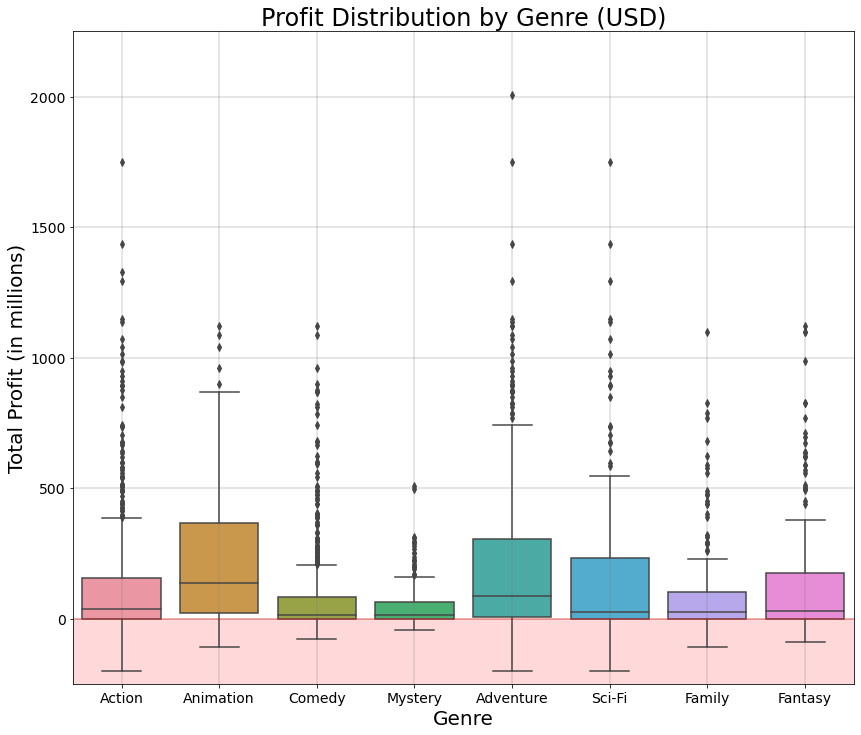

In [24]:
fig, ax = plt.subplots(figsize = (14,12))
sns.boxplot(ax=ax, x=top_8_combined['genre'],
            y=top_8_combined['total_profit'],
            showfliers=True)

plt.style.use('seaborn-muted')

# scale y axis to millions
scale_y = 1e6
ticks_y = FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)
ax.set_ylim(-250000000, 2250000000)

# title/labels/ticks
ax.set_title('Profit Distribution by Genre (USD)', size=24)
plt.xlabel("Genre", size = 20)
plt.ylabel("Total Profit (in millions)", size=20)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(color='gray', linestyle='-', linewidth=2, alpha=0.2)

# adding negative y color
plt.axhline(y=[-1000000], alpha=0.3, color='red', fillstyle='bottom')
plt.axhspan(-2500000000, 0, alpha=0.15, color='red')

# saves fig
#plt.savefig('../resources/charts/top8_outlier_prof_genre_box.png', dpi=fig.dpi)
;

In [25]:
# rename total profit column to median profit
med_combined_8 = med_combined_8.rename({'total_profit': 'median_profit'},
                                       axis=1)
med_combined_8

,median_profit
genre,
Animation,135634931.5
Adventure,87045238.5
Action,34832981.0
Fantasy,30401882.0
Family,26701315.0
Sci-Fi,25068677.5
Comedy,15275343.5
Mystery,13945682.0
